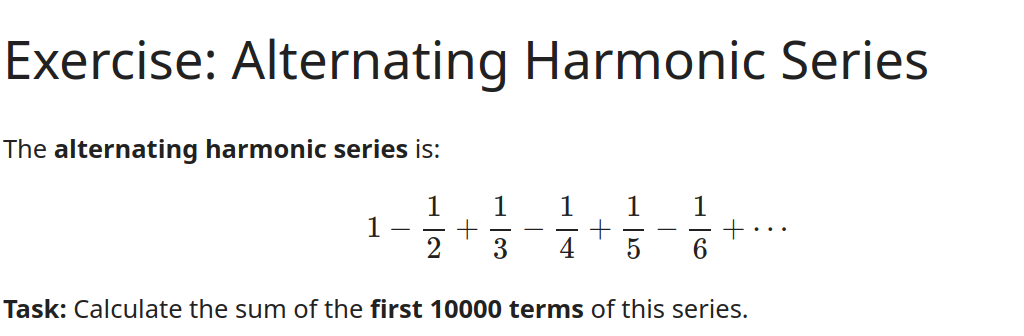

In [79]:
sum = 0.

for i in range(10000):
    #print (1./(i+1))
    sign = (-1)**i
    #print (sign)
    term = sign * 1./(i+1)
    sum = sum + term
print ("total iteration = %d"%(i+1))    
print (sum)

total iteration = 10000
0.6930971830599583


In [105]:
import numpy as np

def ComputeArea(radius):
    area = np.pi * radius ** 2.0 # m^2
    return area


# input parameter
#radius = 1. # m
#radius_arr = np.array([1,2,3,4,5,6,7,8,9,10]) # meter

radius_arr = np.linspace(0., 1., 21) # 11 data points
#output data
area_arr = ComputeArea(radius_arr)
#print ("area = %.5f m^2"%area)
print (area_arr)

[0.         0.00785398 0.03141593 0.07068583 0.12566371 0.19634954
 0.28274334 0.3848451  0.50265482 0.63617251 0.78539816 0.95033178
 1.13097336 1.3273229  1.5393804  1.76714587 2.0106193  2.26980069
 2.54469005 2.83528737 3.14159265]


Text(0, 0.5, '$A = \\pi r^2$')

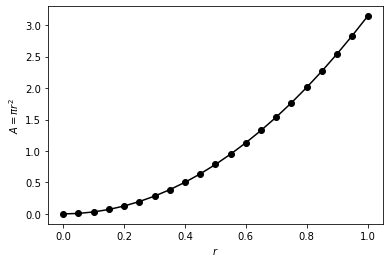

In [106]:
import matplotlib.pyplot as plt

plt.plot(radius_arr, area_arr,'ko-')
plt.xlabel("$r$")
plt.ylabel("$A = \pi r^2$")



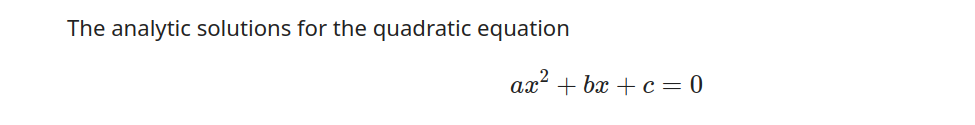
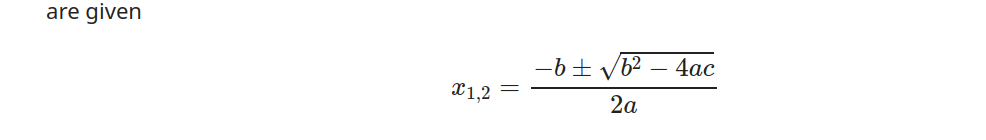


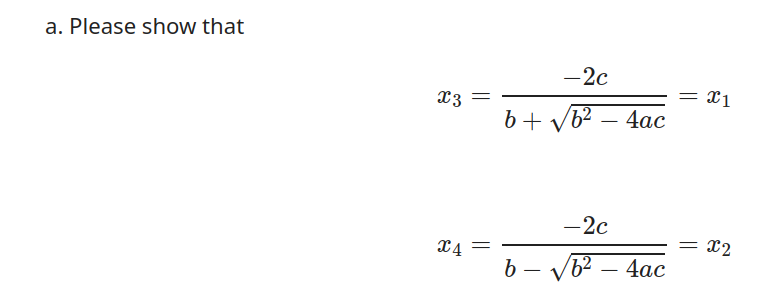

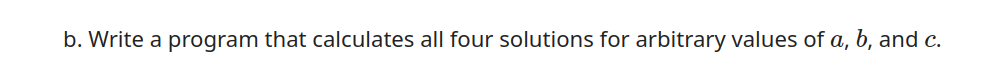

In [111]:
a = 1.
b = 4.
c = 0.5


def ComputeSolutions(a,b,c):
    temp = (b**2.-4. * a * c)**0.5
    x1 = (-b + temp )/(2. * a)
    x2 = (-b - temp)/(2. * a)
    x3 = -2.* c/(b + temp)
    x4 = -2 * c/(b - temp)
    return x1,x2,x3,x4

x1,x2,x3,x4 = ComputeSolutions(a,b,c)
print(x1)
print(x3)


#===
print(x2)
print(x4)


-0.12917130661302934
-0.1291713066130293
-3.8708286933869704
-3.87082869338697


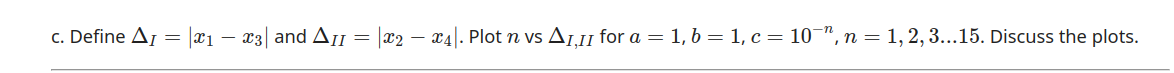

In [118]:
def ComputeErros(a,b,c):
    temp = (b**2.-4. * a * c)**0.5
    x1 = (-b + temp )/(2. * a)
    x2 = (-b - temp)/(2. * a)
    x3 = -2.* c/(b + temp)
    x4 = -2 * c/(b - temp)
    Error_1 = abs(x1 - x3)
    Error_2 = abs(x2 - x4)
    return Error_1, Error_2

#==
a = 1.
b = 1.
c = 1.e-1
Error_1, Error_2 = ComputeErros(a,b,c)
print ("Error_1 = |x1 - x3| = %e" %Error_1)
print ("Error_2 = |x2 - x4| = %e" %Error_2)

Error_1 = |x1 - x3| = 1.387779e-17
Error_2 = |x2 - x4| = 1.110223e-16


In [119]:
#==
a = 1.
b = 1.
c = 1.e-10
Error_1, Error_2 = ComputeErros(a,b,c)
print ("Error_1 = |x1 - x3| = %e" %Error_1)
print ("Error_2 = |x2 - x4| = %e" %Error_2)

Error_1 = |x1 - x3| = 8.264037e-18
Error_2 = |x2 - x4| = 8.264036e-08


In [120]:
#==
a = 1.
b = 1.
c = 1.e-15
Error_1, Error_2 = ComputeErros(a,b,c)
print ("Error_1 = |x1 - x3| = %e" %Error_1)
print ("Error_2 = |x2 - x4| = %e" %Error_2)

Error_1 = |x1 - x3| = 7.992778e-19
Error_2 = |x2 - x4| = 7.999172e-04


Text(-11, 0.0003, '$x_{3,4} = \\frac{-2c}{b\\pm \\sqrt{b^2-4ac}}$')

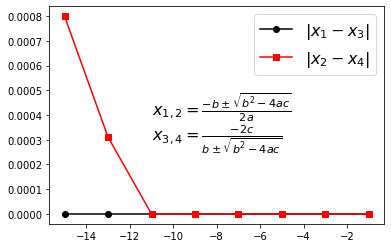

In [136]:
n_arr = np.array([1,3,5,7,9,11,13,15])
n_arr = -1. * n_arr
#print (n_arr)
c =10.**( n_arr)
#print (c)

Error_1, Error_2 = ComputeErros(1.,1.,c)

plt.plot(n_arr,Error_1,'ko-',label = r'$|x_1 - x_3|$')

plt.plot(n_arr,Error_2,'rs-',label = r'$|x_2 - x_4|$')

plt.legend(loc="upper right", fontsize = 16, numpoints=1) 

plt.text(-11, 0.0004, r"$x_{1,2} = \frac{-b\pm \sqrt{b^2-4ac}}{2a}$", fontsize =16)
plt.text(-11, 0.0003, r"$x_{3,4} = \frac{-2c}{b\pm \sqrt{b^2-4ac}}$", fontsize =16)



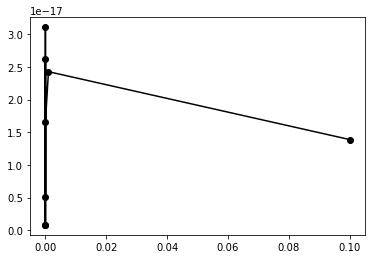

In [131]:
plt.plot(c,Error_1,'ko-')